## Product improvement statistical insight from Customer feedback using BERT.

### 1. Importing the libraries

In [1]:
# Import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

### Load Datasets

In [140]:
# Read the dataset
df = pd.read_csv('Raw Dataset/20191226-items.csv')

### Product Mapping

In [141]:
# create a new dataframe with columns for product ID, brand, and model
product_mapping = df[['asin', 'brand', 'title']].copy()

# rename the columns to match the desired format
product_mapping = product_mapping.rename(
    columns={'asin': 'product_id', 'brand': 'product_brand', 'title': 'product_model_name'})

# save the product mapping as a CSV file
product_mapping.to_csv('Raw Dataset/product_mapping.csv', index=False)


In [142]:
df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,https://www.amazon.com/Dual-Band-Tri-Mode-Activated-Dialing-Backlit/dp/B0000SX2UC,https://m.media-amazon.com/images/I/2143EBQ210L._AC_UY218_ML3_.jpg,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phone/dp/B0009N5L7K,https://m.media-amazon.com/images/I/419WBAVDARL._AC_UY218_ML3_.jpg,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE,https://www.amazon.com/MOTOROLA-C168i-CINGULAR-PREPAID-GOPHONE/dp/B000SKTZ0S,https://m.media-amazon.com/images/I/71b+q3ydkIS._AC_UY218_ML3_.jpg,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boost-Mobile/dp/B001AO4OUC,https://m.media-amazon.com/images/I/710UO8gdT+L._AC_UY218_ML3_.jpg,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-cellular-phone/dp/B001DCJAJG,https://m.media-amazon.com/images/I/61LYNCVrrKL._AC_UY218_ML3_.jpg,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [143]:
# print all the columns
df.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### Rename the columns

In [144]:
# rename the columns
df = df.rename(columns={'asin': 'product_id',
               'title': 'product_model_name', 'brand': 'product_brand'})



In [145]:
df.head()

,product_id,product_brand,product_model_name,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,https://www.amazon.com/Dual-Band-Tri-Mode-Activated-Dialing-Backlit/dp/B0000SX2UC,https://m.media-amazon.com/images/I/2143EBQ210L._AC_UY218_ML3_.jpg,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phone/dp/B0009N5L7K,https://m.media-amazon.com/images/I/419WBAVDARL._AC_UY218_ML3_.jpg,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE,https://www.amazon.com/MOTOROLA-C168i-CINGULAR-PREPAID-GOPHONE/dp/B000SKTZ0S,https://m.media-amazon.com/images/I/71b+q3ydkIS._AC_UY218_ML3_.jpg,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boost-Mobile/dp/B001AO4OUC,https://m.media-amazon.com/images/I/710UO8gdT+L._AC_UY218_ML3_.jpg,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-cellular-phone/dp/B001DCJAJG,https://m.media-amazon.com/images/I/61LYNCVrrKL._AC_UY218_ML3_.jpg,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


### Check Missing Values

In [146]:
# Check missing values
df.isnull().sum()

product_id            0
product_brand         4
product_model_name    0
url                   0
image                 0
rating                0
reviewUrl             0
totalReviews          0
price                 0
originalPrice         0
dtype: int64

In [147]:
# Change Missing values to 'Unknown'
df['product_brand'] = df['product_brand'].fillna('Unknown')

### Print which brand has the most number of products

In [148]:

df['product_brand'].value_counts()

Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Unknown       4
Name: product_brand, dtype: int64

### Print the number of products in each brand

<Axes: >

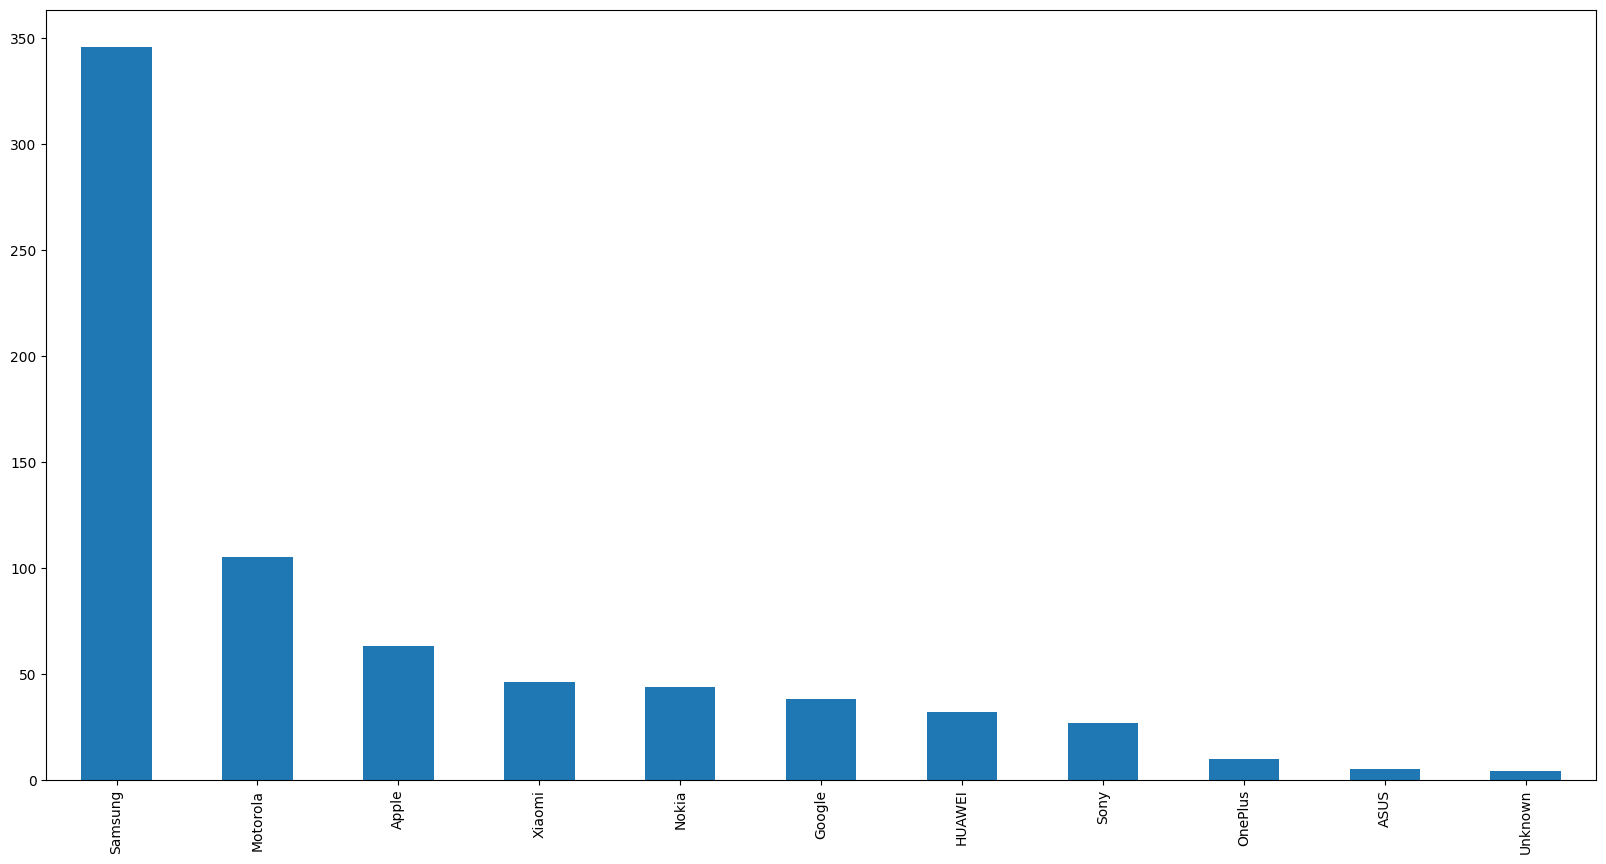

In [149]:

df['product_brand'].value_counts().plot(kind='bar', figsize=(20, 10))

In [150]:
# load reviews dataset
reviews = pd.read_csv('Raw Dataset/20191226-reviews.csv')

In [151]:
reviews.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [153]:
# Save the merged dataset as a CSV file
merged_df.to_csv('Raw Dataset/merged_dataset.csv', index=False)

In [154]:
# Columns in the merged dataset
merged_df.columns

Index(['product_id', 'product_brand', 'product_model_name', 'name', 'rating',
       'verified', 'title', 'body', 'helpfulVotes'],
      dtype='object')

In [155]:
import pandas as pd

# read the merged dataset
merged_df = pd.read_csv('Raw Dataset/merged_dataset.csv')

# reorder the columns and drop the 'asin' column
merged_df = merged_df[['product_id', 'product_brand', 'product_model_name',
                       'name', 'rating', 'verified', 'title', 'body', 'helpfulVotes']]

# save the updated dataset to a new file
merged_df.to_csv('Dataset/updated_merged_dataset.csv', index=False)


## Read the updated merged dataset

In [11]:
# read the updated merged dataset
merged_df = pd.read_csv('Dataset/updated_merged_dataset.csv')

In [12]:
# Columns name
merged_df.columns

Index(['product_id', 'product_brand', 'product_model_name', 'name', 'rating',
       'verified', 'title', 'body', 'helpfulVotes'],
      dtype='object')

In [13]:
# Print All Brands
merged_df['product_brand'].unique()

array([nan, 'Motorola', 'Nokia', 'Samsung', 'HUAWEI', 'Sony', 'Apple',
       'Google', 'ASUS', 'OnePlus', 'Xiaomi'], dtype=object)

In [7]:
from collections import Counter
import nltk

# download stopwords if not already downloaded
nltk.download('stopwords')

# get all the words from the 'body' column
words = []
for text in merged_df['body']:
    if isinstance(text, str):
        words += text.lower().split()

# remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# count the frequency of each word
word_counts = Counter(words)

# get the top 10 most common words
top_words = word_counts.most_common(20)

print(top_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mostafizur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('phone', 71898), ('great', 15888), ('phone.', 14638), ('battery', 13833), ('like', 13355), ('good', 13254), ('screen', 11893), ('one', 11477), ('get', 10510), ('would', 9825), ('use', 9608), ('new', 8648), ('love', 8351), ('it.', 8304), ('works', 8010), ('camera', 7870), ('really', 7505), ('even', 7231), ('samsung', 6913), ("i'm", 6897)]


## Analysis of the reviews

In [9]:
# Most Frequent Words
merged_df = pd.DataFrame(top_words, columns=['word', 'count'])
# Print Most Frequent Words
merged_df = merged_df.sort_values(by='count', ascending=False)
merged_df.head(20)
 

,word,count
0,phone,71898
1,great,15888
2,phone.,14638
3,battery,13833
4,like,13355
...,...,...
15,camera,7870
16,really,7505
17,even,7231
18,samsung,6913


In [33]:
from textblob import TextBlob
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset/updated_merged_dataset.csv")
df.dropna(inplace=True)


# Define a function to calculate the sentiment polarity of a text

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment


# Calculate the sentiment polarity of each review
df['sentiment'] = df['body'].apply(get_sentiment)

# Calculate the percentage of negative reviews for each brand
neg_reviews = df[df['sentiment'] < 0]
brand_counts = neg_reviews['product_brand'].value_counts()
total_counts = df['product_brand'].value_counts()
neg_percents = (brand_counts / total_counts) * 100

# Print the results
print("Percentage of negative reviews for each brand:")
print(neg_percents)


Percentage of negative reviews for each brand:
ASUS        13.636364
Apple       18.415179
Google      18.484501
HUAWEI       9.940358
Motorola    14.274084
Nokia       14.909091
OnePlus      8.187135
Samsung     17.243850
Sony        12.597015
Xiaomi       6.807964
Name: product_brand, dtype: float64


In [34]:
# Count the number of comments for each brand
brand_counts = df['product_brand'].value_counts()

# Print the result
print("Number of comments for each brand:")
print(brand_counts)


Number of comments for each brand:
Samsung     12561
Motorola     3685
Nokia        2750
Apple        1792
Google       1742
Sony         1675
Xiaomi       1557
HUAWEI       1006
OnePlus       171
ASUS          132
Name: product_brand, dtype: int64


In [35]:
# Define a function to calculate the sentiment polarity of a text using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment


# Calculate the sentiment polarity of each review
df['sentiment'] = df['body'].apply(get_sentiment)

# Filter the negative reviews by selecting only the rows where the sentiment polarity is less than 0
neg_reviews = df[df['sentiment'] < 0]

# Count the number of negative reviews for each brand
neg_counts = neg_reviews['product_brand'].value_counts()

# Print the result
print("Number of negative reviews for each brand:")
print(neg_counts)


Number of negative reviews for each brand:
Samsung     2166
Motorola     526
Nokia        410
Apple        330
Google       322
Sony         211
Xiaomi       106
HUAWEI       100
ASUS          18
OnePlus       14
Name: product_brand, dtype: int64


In [36]:
from transformers import pipeline

# Load the pre-trained BERT model for sentiment analysis
nlp = pipeline('sentiment-analysis',
               model='nlptown/bert-base-multilingual-uncased-sentiment')

# Define a function to classify the sentiment of a text using the pre-trained BERT model


def get_sentiment(text):
    result = nlp(text)[0]
    if result['label'] == 'NEGATIVE':
        return result['score'] * -1
    else:
        return result['score']


# Calculate the sentiment score of each review
df['sentiment'] = df['body'].apply(get_sentiment)

# Filter the negative reviews by selecting only the rows where the sentiment score is less than 0
neg_reviews = df[df['sentiment'] < 0]

# Calculate the percentage of negative reviews for each brand
brand_counts = neg_reviews['product_brand'].value_counts()
total_counts = df['product_brand'].value_counts()
neg_percents = (brand_counts / total_counts) * 100

# Print the results
print("Percentage of negative comments for each brand using BERT:")
print(neg_percents)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
